<a href="https://colab.research.google.com/github/FabioCarlesso/ds-study-codes/blob/main/Codes/Pos/IrisCluster.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:26: UserWarning: Pandas doesn't allow columns to be created via a new attribute name - see https://pandas.pydata.org/pandas-docs/stable/indexing.html#attribute-access
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:27: UserWarning: Pandas doesn't allow columns to be created via a new attribute name - see https://pandas.pydata.org/pandas-docs/stable/indexing.html#attribute-access


########################
[[6.30103093 2.88659794 4.95876289 1.69587629]
 [5.00566038 3.36037736 1.56226415 0.28867925]]
152.36870647733906
########################
[1.943034159037026, 0.856027968244863, 0.648839494895334, 0.5581937771352218, 0.5104611995137194, 0.46638747942971565, 0.4372158464586666, 0.4114420911082941, 0.4008392975765229, 0.3827659406541688]


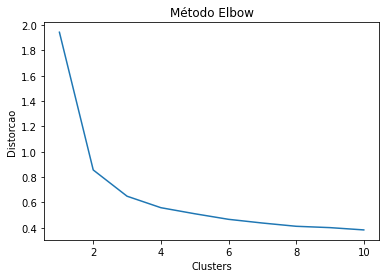

In [ ]:
#Bibliotecas para instalar
#Pandas
#numpy
#matplotlib
#sklearn
#scipy
# baixar iris.csv da pasta de dados do módulo
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from sklearn import metrics
from scipy.spatial.distance import euclidean, cdist

#objeto para os dados
iris = pd.read_csv('iris.csv') #, usecols=[0,1,2,3]

#Dados para plotagem
x0=iris.iloc[:,0]
x1=iris.iloc[:,1]
x2=iris.iloc[:,2]
x3=iris.iloc[:,3]


iris.y = iris.iloc[:,4]#isolar a coluna classe
iris.x = iris.drop(columns=['class '],axis=1) #isolar as colunas independentes

fig,ax =plt.subplots()

#Agrupar os objetos em um lista de vetores
X = np.array(list(zip(x0,x1,x2,x3))).reshape(len(x0),4)


KmeansModel = KMeans(n_clusters=2).fit(X)
print('########################')
print(KmeansModel.cluster_centers_)
print(KmeansModel.inertia_)
print('########################')

#Calcular as ditorções
distorcoes=[]

K = range(1,11) # Criando uma lista de valores (de 1 a 10 clusters para avaliar o ganho)
for k in K:
    # obtenção provisória de um modelo de clusters com k grupos
    KmeansModel = KMeans(n_clusters=k).fit(X)

    distorcoes.append(
        sum(
            np.min(
                cdist(X, KmeansModel.cluster_centers_, 'euclidean')
                , axis=1)) / X.shape[0])

print(distorcoes)

# Setup e impressão do gráfico Elbow
ax.plot(K, distorcoes)
ax.set(xlabel='Clusters', ylabel='Distorcao',
       title='Método Elbow')

plt.savefig('elbow_dist.png')
plt.show()

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:10: UserWarning: Pandas doesn't allow columns to be created via a new attribute name - see https://pandas.pydata.org/pandas-docs/stable/indexing.html#attribute-access
  # Remove the CWD from sys.path while we load stuff.
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:11: UserWarning: Pandas doesn't allow columns to be created via a new attribute name - see https://pandas.pydata.org/pandas-docs/stable/indexing.html#attribute-access
  # This is added back by InteractiveShellApp.init_path()


########################
[[6.30103093 2.88659794 4.95876289 1.69587629]
 [5.00566038 3.36037736 1.56226415 0.28867925]]
152.36870647733906
########################


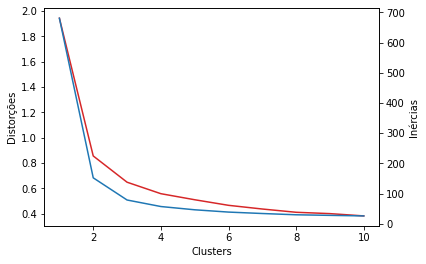

In [ ]:
#objeto para os dados
iris = pd.read_csv('iris.csv') #, usecols=[0,1,2,3]

#Dados para plotagem
x0=iris.iloc[:,0]
x1=iris.iloc[:,1]
x2=iris.iloc[:,2]
x3=iris.iloc[:,3]

iris.y = iris.iloc[:,4]#isolar a coluna classe
iris.x = iris.drop(columns=['class '],axis=1) #isolar as colunas independentes

fig,ax =plt.subplots()

#Agrupar os objetos em um lista de vetores
X = np.array(list(zip(x0,x1,x2,x3))).reshape(len(x0),4)


KmeansModel = KMeans(n_clusters=2).fit(X)
print('########################')
# Imprimir os centroides
print(KmeansModel.cluster_centers_)
# Imprimir Inercia do  modelo obtido de clusters
print(KmeansModel.inertia_)
print('########################')

#Calcular as ditorções

inercias = []
K = range(1, 11)

for k in K:
    Kmeans = KMeans(n_clusters= k).fit(X)
    inercias.append(Kmeans.inertia_)


# Setup e impressão do gráfico Elbow
# ax.plot(K, inercias)
# ax.set(xlabel='Clusters', ylabel='Inercias',
#        title='Método Elbow')

# plt.savefig('elbow_dist.png')
# plt.show()

# # Setup e impressão do gráfico Elbow
color = 'tab:red'
ax.plot(K, distorcoes, color='tab:red')
ax.set_xlabel('Clusters')
ax.set_ylabel('Distorções')
ax2 = ax.twinx()
ax2.plot(K, inercias, color='tab:blue')
ax2.set_ylabel('Inércias')
# ax.set(xlabel="Clusters", title="Método Elbow")
plt.show()